# Predicting Dutch Speaking Proficiency in Adult Language Learners

This project aims to predict the speaking proficiency of adult learners taking the State Examination of Dutch as a Second Language (STEX) using machine learning models. The dataset, originally compiled by Schepens, van Hout, and Jaeger (2020) and available on [Kaggle](https://www.kaggle.com/datasets/thedevastator/adult-language-learning-profile/data?select=stex.csv), contains anonymized exam results and demographic information of learners residing in the Netherlands.

#### Key features considered include:

- Linguistic background (e.g., native language, language family)
- Demographic factors (e.g., age of arrival, length of residence)
- Education & Enrollment (e.g., prior schooling, education accessibility)
- Personal attributes 

#### The project follows a structured ML pipeline, including:

- [1. Data Loading](#1)
- [2. Exploratory Data Analysis](#2)
- [3. Train/Test split](#3)
- [4. Feature Engineering](#4)
- [5. Regression Modeling](#5)
- [6. Hyperparameter tuning](#6)
- [7. Selecting best model](#7)
- [8. Model interpretation](#8)
- [9. Results](#9)
- [10. Save model](#10)

The results of this study can help policymakers and educators understand the strongest predictors of language learning success, potentially guiding future language programs and interventions.

#### Project Contributors

This project was developed by:
- [Yohan Jair Rivera Farías](https://www.linkedin.com/in/yohan-rivera-12b847261/)
- Fabián Hernando Rivera Farías 

Computer Science students at Unicomfacauca in Popayán, Colombia 🇨🇴 

It was completed as part of their final project for the AI4All elective, under the supervision of Professor [Viviana Márquez](https://www.linkedin.com/in/vivianamarquez/). 

<hr>

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=ConvergenceWarning)

# 1. Data Loading <a id="1"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/stex.csv", encoding = "ISO-8859-1")

In [5]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


#### Data dictionary provided by OP

|  Name  | Description  |  Type |
|:-------------:|:-------------:|:-----------:|
| **L1**  | Native language of the participant.  | *String* |
| **C**  | Country of origin of the participant.  | *String* |
| **L1L2**  | Linguistic similarity between the native language and the target language.  | *Integer* |
| **AaA**  | Age at arrival in the Netherlands.  | *Integer* |
| **LoR**  | Length of residence in the Netherlands.  | *Integer* |
| **Edu.day**  | Formal education days in the target language.  | *Integer* |
| **Sex**  | Gender of the participant.  | *String* |
| **Family**  | Family status of the participant.  | *String* |
| **ISO639.3**  | ISO 639-3 codes for the target language.  | *String* |
| **Enroll**  | Duration enrolled in language courses.  | *Integer* |
| **Speaking**  | Speaking proficiency test score on the State Examination of Dutch as a Second Language.  | *Integer* |
| **morph**  | Morphological score related to knowledge structures within words.  | *Integer* |
| **lex**  | Lexicon score indicating understanding of written words.  | *Integer* |
| **new_feat**  | Feature score reflecting ability to acquire new sounds/grammatical structures.  | *Integer* |
| **new_sounds**  | Sound symbols score evaluating pronunciation.  | *Integer* |


Since all participants from the same native language share the same `morph`, `lex`, `new_feat`, and `new_sounds` scores, it suggests that these metrics were not measured per individual. To avoid models that will treat those variables as a proxy for native language rather than a real independent predictor, **we will drop them from project.**

In [6]:
to_drop = ['morph', 'lex', 'new_feat', 'new_sounds']
df = df.drop(to_drop, axis=1)

In [7]:
df.isnull().sum().sum()

9

Additionally, since there are at most 9 rows with missing values, we will drop these from our project as well.

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639


# 2. Exploratory Data Analysis <a id="2"></a>

In [10]:
print("Number of rows and columns in the dataset")
print(df.shape)

Number of rows and columns in the dataset
(50226, 12)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   L1        50226 non-null  object 
 1   C         50226 non-null  object 
 2   L1L2      50226 non-null  object 
 3   L2        50226 non-null  object 
 4   AaA       50226 non-null  int64  
 5   LoR       50226 non-null  int64  
 6   Edu.day   50226 non-null  float64
 7   Sex       50226 non-null  object 
 8   Family    50226 non-null  object 
 9   ISO639.3  50226 non-null  object 
 10  Enroll    50226 non-null  int64  
 11  Speaking  50226 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 4.6+ MB


In [12]:
print("Descriptive statistics of numerical variables:")
df.describe()

Descriptive statistics of numerical variables:


,AaA,LoR,Edu.day,Enroll,Speaking
count,50226.000000,50226.000000,50226.000000,50226.000000,50226.000000
mean,26.488054,3.922431,3.134213,81.145682,517.621451
std,7.245390,4.274978,0.855379,25.348130,37.917945
min,0.000000,0.000000,1.000000,8.000000,270.000000
25%,22.000000,2.000000,3.000000,67.000000,494.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000


In [13]:
print("Descriptive statistics of categorical variables:")
df.describe(include=['object', 'category'])

Descriptive statistics of categorical variables:


,L1,C,L1L2,L2,Sex,Family,ISO639.3
count,50226,50226,50226,50226,50226,50226,50226
unique,70,119,737,44,2,14,70
top,Arabic,Germany,GermanEnglish,English,Female,Indo-European,ara
freq,5927,4869,4335,27879,33304,34336,5927


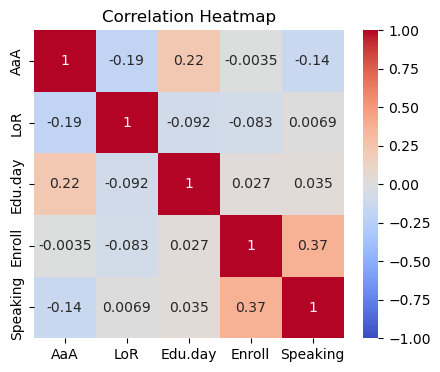

In [14]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap for the numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Insights from the correlation matrix
    
- Time spent in language courses (`Enroll`) is positively correlated with speaking proficiency (`Speaking`). This suggests that longer participation in formal language courses is associated with higher speaking scores. However, correlation does not imply causation—this could mean that dedicated learners enroll longer, rather than courses directly improving proficiency.
- Age at Arrival (`AaA`) has a weak negative correlation with `Speaking`. This indicates that arriving in the Netherlands at an older age is slightly associated with lower speaking proficiency. However, the correlation is weak, meaning age alone is not a strong predictor of language learning success.
- General education level (`Edu.day`) has a weak positive correlation with age of arrival (`AoA`). This might suggest that those who arrive at an older age are already coming with degrees.
- Length of residense (`LoR`) has weak negative correlations with most variables, meaning the duration someone has lived in the Netherlands does not strongly correlate with general education level, enrollment, or speaking proficiency.

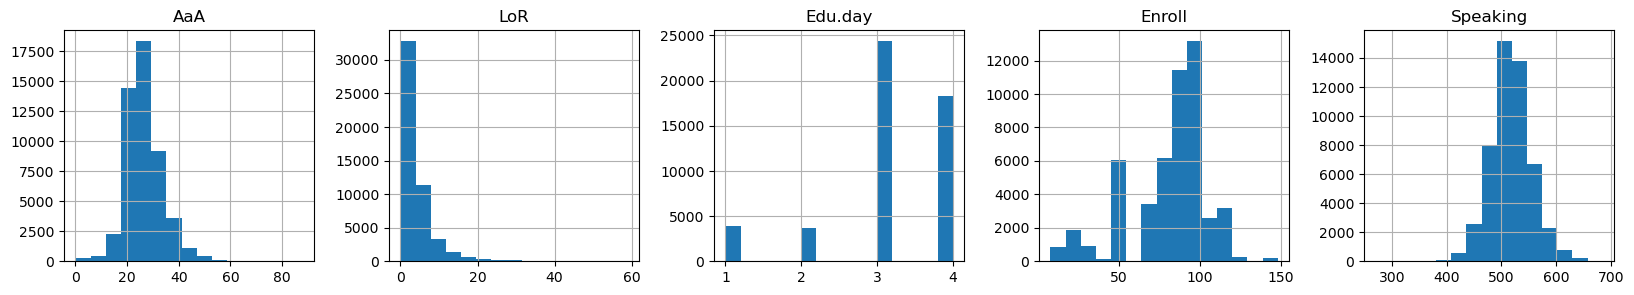

In [15]:
# Histograms for numerical variables
df_numeric.hist(bins=15, figsize=(20, 3), layout=(1, 5))
plt.show()

- `AoA`: Most participants arrived in the Netherlands between ages 20 and 40.
- `LoR`: Most participants are recent immigrants, meaning they have spent less than 10 years in the country.
- `Edu.day`: Most participants have had at least 11 years of schooling, with a significant number having 16 or more years. 
- `Enroll`: Enrollment in the courses show multiple peaks, suggesting that different groups of learners follow distinct enrollment patterns (some my enroll in shorter courses, while others take extensive language training.) 
- `Speaking` proficiency is normally distributed, meaning that most learners score around the average speaking proficiency.

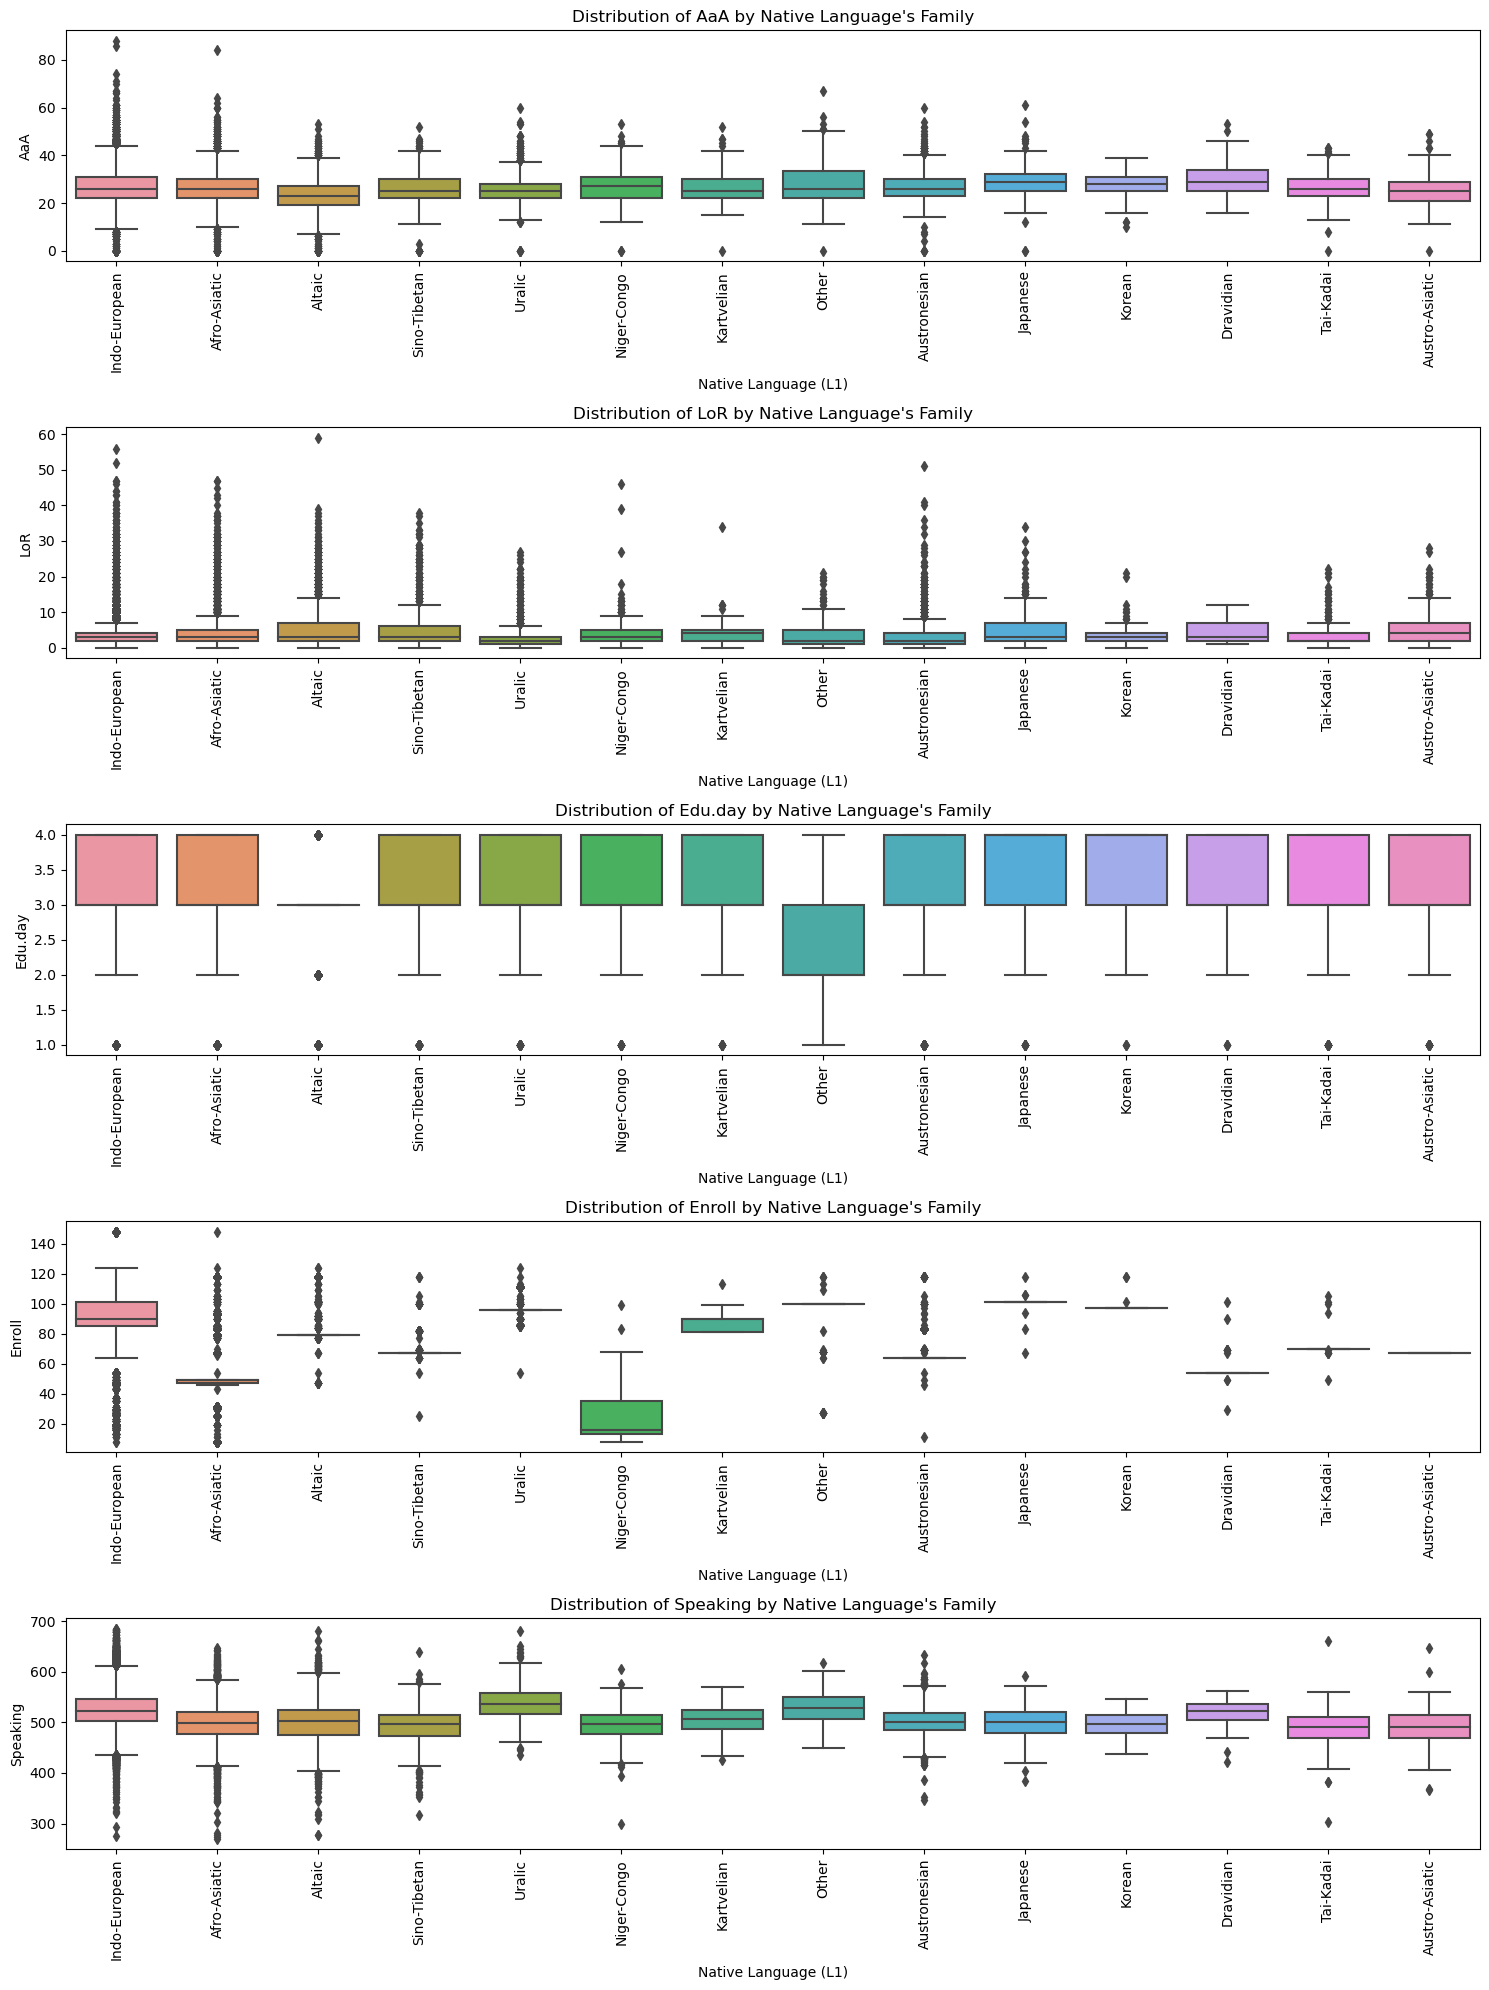

In [16]:
# Select only numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x='Family', y=col)
    plt.xticks(rotation=90)  
    plt.xlabel("Native Language (L1)")
    plt.ylabel(col)
    plt.title(f"Distribution of {col} by Native Language's Family")

plt.tight_layout()
plt.show()

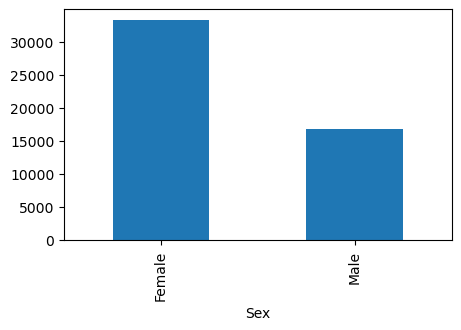

In [17]:
df['Sex'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.show()

- We have considered the ethical implications of incorporating gender in a machine learning model. By excluding gender as a feature, we aim to prevent the model from learning potentially biased patterns or making unfair assumptions about language proficiency based on gender. This ensures that predictions remain fair and equitable for all learners.

In [18]:
to_drop = ['Sex']
df = df.drop(to_drop, axis=1)

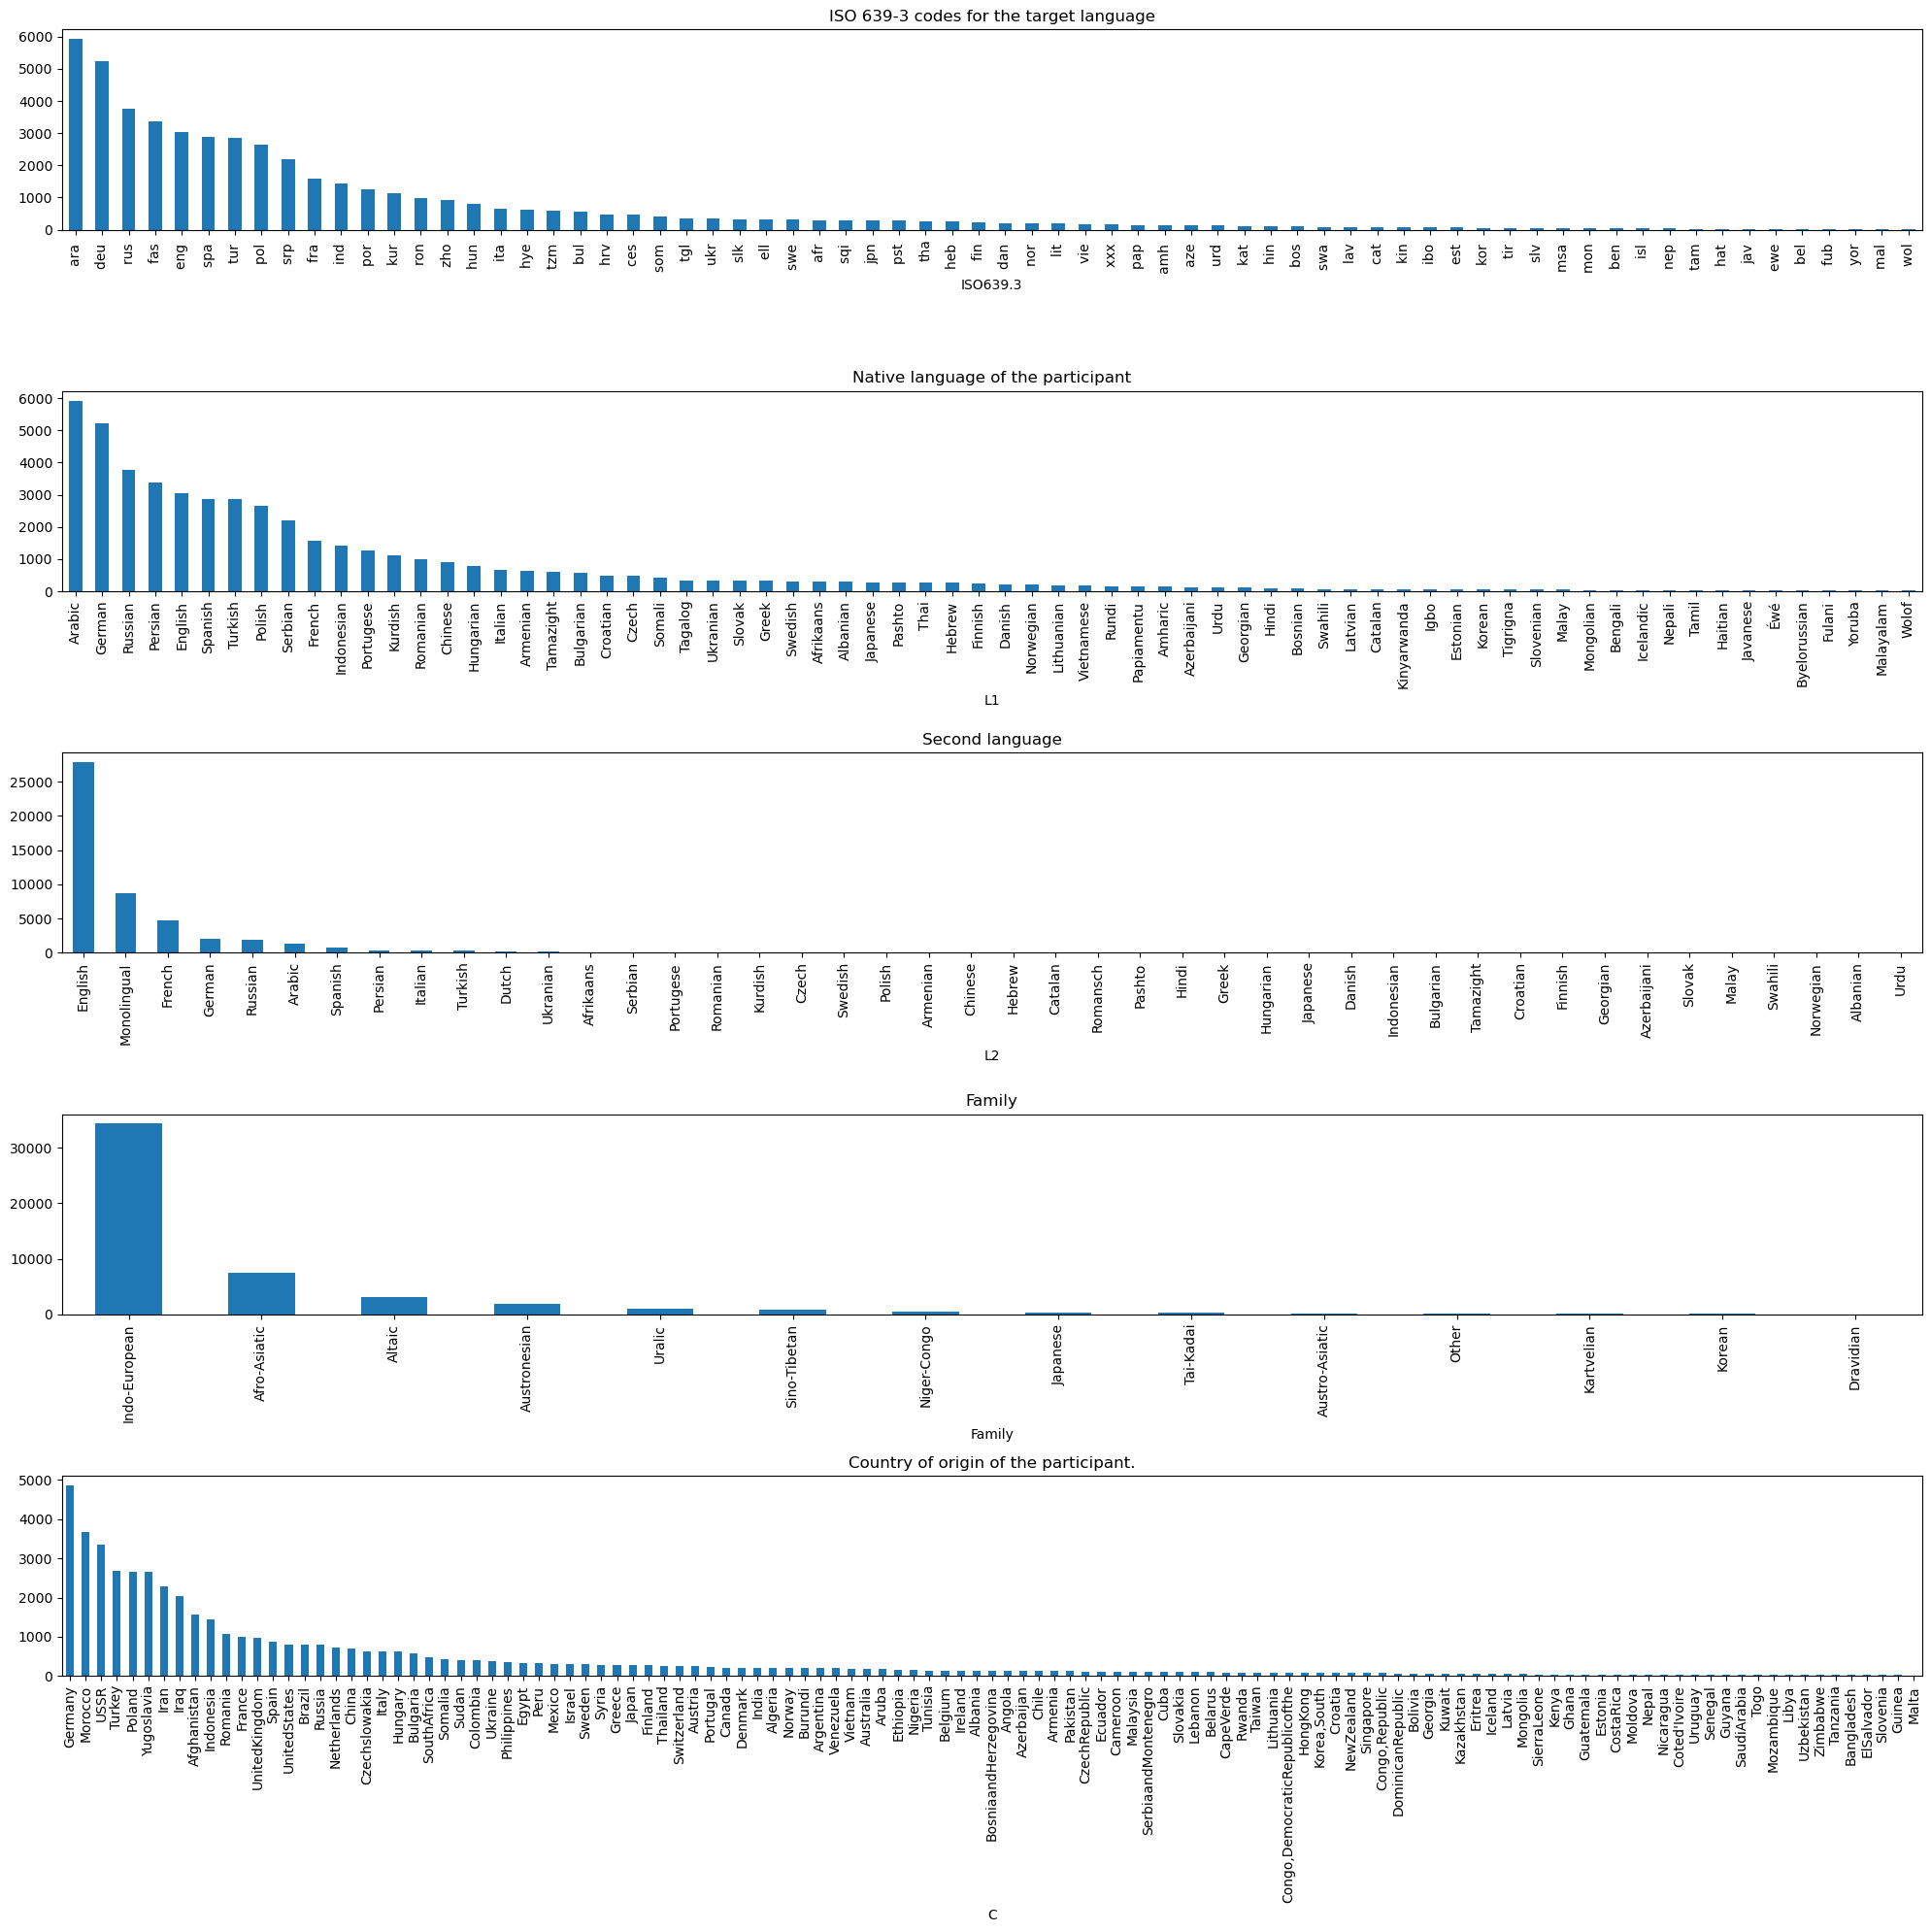

In [19]:
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

df['ISO639.3'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('ISO 639-3 codes for the target language')

df['L1'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Native language of the participant')

df['L2'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Second language')

df['Family'].value_counts().plot(kind='bar', ax=axes[3])
axes[3].set_title('Family')

df['C'].value_counts().plot(kind='bar', ax=axes[4])
axes[4].set_title('Country of origin of the participant.')

plt.tight_layout()
plt.show()

In [20]:
df.L1L2.nunique()

737

- `ISO639.3` and `L1` are repeated features. We'll drop `ISO639.3`.
- We will also disregard `L1L2` given that it has cardinality and the information it contains is present in `L1` and `L2`. 
- Considering ethical issues and its high cardinality, we will also remove the country (`C`) variable given we want to avoid disadvantaging underrepresented groups by making inaccurate predictions or excluding them from meaningful insights.

In [21]:
to_drop = ['ISO639.3', 'L1L2', 'C']
df = df.drop(columns=to_drop)

In [22]:
df.head()

,L1,L2,AaA,LoR,Edu.day,Family,Enroll,Speaking
0,Afrikaans,English,25,0,4.0,Indo-European,93,496
1,Afrikaans,German,47,2,4.0,Indo-European,93,542
2,Afrikaans,Monolingual,23,23,3.0,Indo-European,93,585
3,Afrikaans,Monolingual,42,2,2.0,Indo-European,93,521
4,Afrikaans,Monolingual,22,19,3.0,Indo-European,93,639


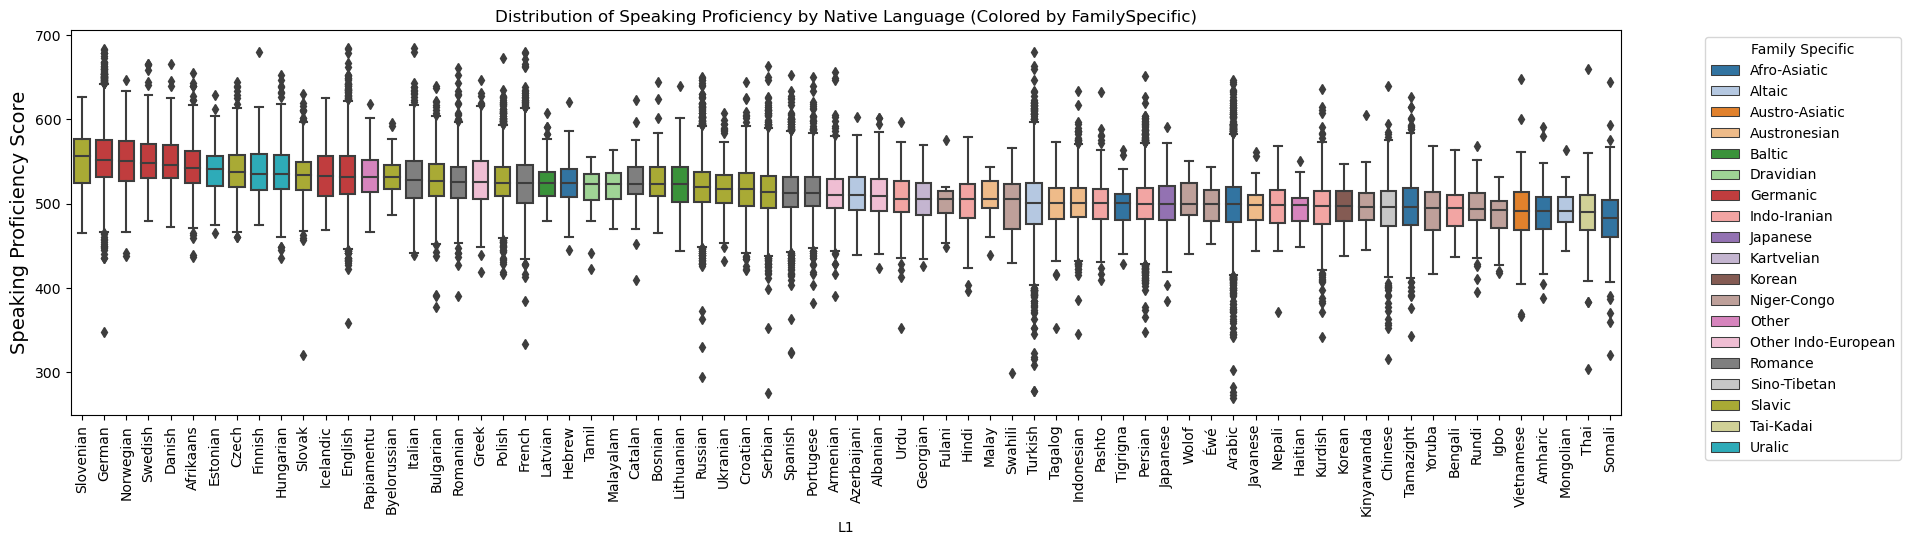

In [23]:
# Dictionary to map languages (L1) to their respective Indo-European subfamilies
language_family_dict = {
    # Germanic Branch
    "German": "Germanic", "English": "Germanic", "Afrikaans": "Germanic",
    "Danish": "Germanic", "Norwegian": "Germanic", "Swedish": "Germanic",
    "Icelandic": "Germanic",
    
    # Romance Branch
    "Spanish": "Romance", "French": "Romance", "Portugese": "Romance",
    "Romanian": "Romance", "Italian": "Romance", "Catalan": "Romance",
    
    # Slavic Branch
    "Russian": "Slavic", "Polish": "Slavic", "Serbian": "Slavic",
    "Bulgarian": "Slavic", "Croatian": "Slavic", "Czech": "Slavic",
    "Ukranian": "Slavic", "Slovak": "Slavic", "Bosnian": "Slavic",
    "Slovenian": "Slavic", "Byelorussian": "Slavic",
    
    # Indo-Iranian Branch
    "Persian": "Indo-Iranian", "Pashto": "Indo-Iranian",
    "Hindi": "Indo-Iranian", "Urdu": "Indo-Iranian",
    "Bengali": "Indo-Iranian", "Nepali": "Indo-Iranian",
    "Kurdish": "Indo-Iranian",
    
    # Baltic Branch
    "Lithuanian": "Baltic", "Latvian": "Baltic",
    
    # Others
    "Greek": "Other Indo-European",
    "Armenian": "Other Indo-European",
    "Albanian": "Other Indo-European",
}

df['FamilySpecific'] = df.apply(lambda row: language_family_dict.get(row['L1'], row['Family']), axis=1)

# Ensure FamilySpecific is a categorical variable
df["FamilySpecific"] = df["FamilySpecific"].astype("category")

# Compute the median Speaking score for each L1 group (sorting)
median_order = df.groupby("L1")["Speaking"].median().sort_values(ascending=False).index

# Melt the DataFrame to long format for Seaborn compatibility
melted_df = df[['L1', 'Speaking', 'FamilySpecific']].melt(id_vars=['L1', 'FamilySpecific'], var_name="Variable", value_name="Score")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Define a custom color palette for FamilySpecific categories
palette = sns.color_palette("tab20", n_colors=df["FamilySpecific"].nunique())

# Create a boxplot with FamilySpecific as hue
sns.boxplot(data=melted_df, x='L1', y='Score', hue='FamilySpecific', order=median_order, palette=palette, width=0.7, dodge=False, ax=ax)

# Remove the legend since colors already indicate FamilySpecific
ax.legend_.remove()

# Improve readability
ax.set_ylabel("Speaking Proficiency Score", fontsize=14)
ax.set_title("Distribution of Speaking Proficiency by Native Language (Colored by FamilySpecific)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend for FamilySpecific colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Family Specific", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


- The Germanic languages (e.g., German, English, Dutch, Swedish, Norwegian, Danish) tend to have higher median Speaking scores.
- This aligns with expectations since Dutch is a Germanic language, making it easier for speakers of closely related languages to acquire Dutch-speaking skills.
- Uralic languages and some slavic languages also perform well. Possible reasons: Strong language education systems, multilingual exposure, or high motivation.

We decided to group `L1` and `L2` into four broad categories—Indo-European (non-Germanic), Non-Indo-European, Germanic, and Monolingual (only for L2)—to improve both model interpretability and statistical robustness. Many languages in the dataset are underrepresented, which could lead to unreliable estimates or overfitting. 

Additionally, given linguistic similarities, Germanic languages are expected to provide an advantage in learning Dutch, making this grouping more aligned with domain knowledge. This approach also reduces dimensionality, making insights more meaningful and generalizable. However, initial data exploration suggests that Uralic languages may perform exceptionally well in learning Dutch, warranting further investigation in future analyses.

In [24]:
germanic_languages = [
    "English", "German", "Dutch", "Afrikaans", "Yiddish", "Frisian",
    "Icelandic", "Norwegian", "Swedish", "Danish", "Faroese", "Luxembourgish",
    "Scots", "Elfdalian"
]

indo_european = [lang for lang in df[df['Family']=='Indo-European']['L1'].value_counts().keys() if lang not in germanic_languages]

def l_modified(language):
    if language == 'Monolingual':
        return language
    if language in germanic_languages:
        return "Germanic"
    if language in indo_european:
        return 'Indo-European (Non-Germanic)'
    return 'Non-Indo-European'

In [25]:
df['L1_mod'] = df['L1'].apply(lambda row: l_modified(row))
df['L2_mod'] = df['L2'].apply(lambda row: l_modified(row))

In [26]:
df['L2_mod'] = df['L2_mod'].apply(lambda row: row if row in ['Germanic', 'Monolingual'] else 'Other')

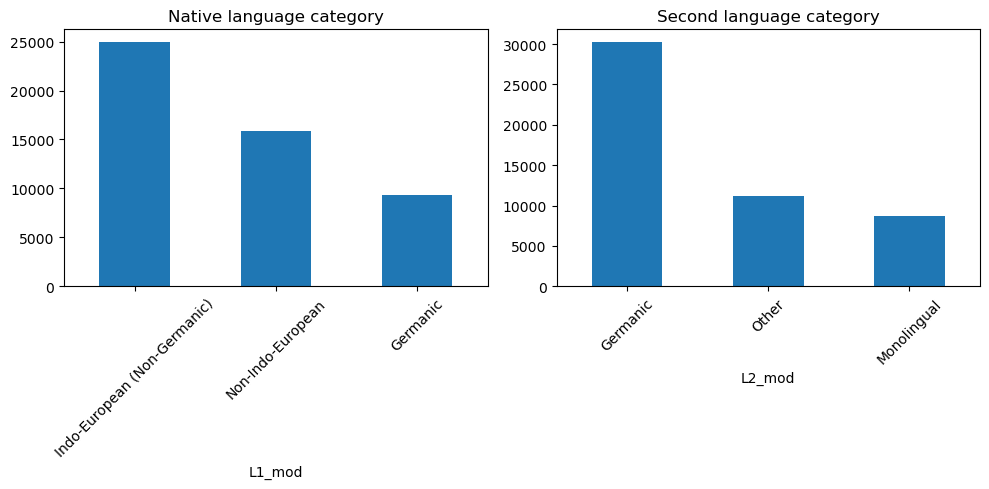

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df['L1_mod'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Native language category')
axes[0].tick_params(axis='x', rotation=45)

df['L2_mod'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Second language category')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

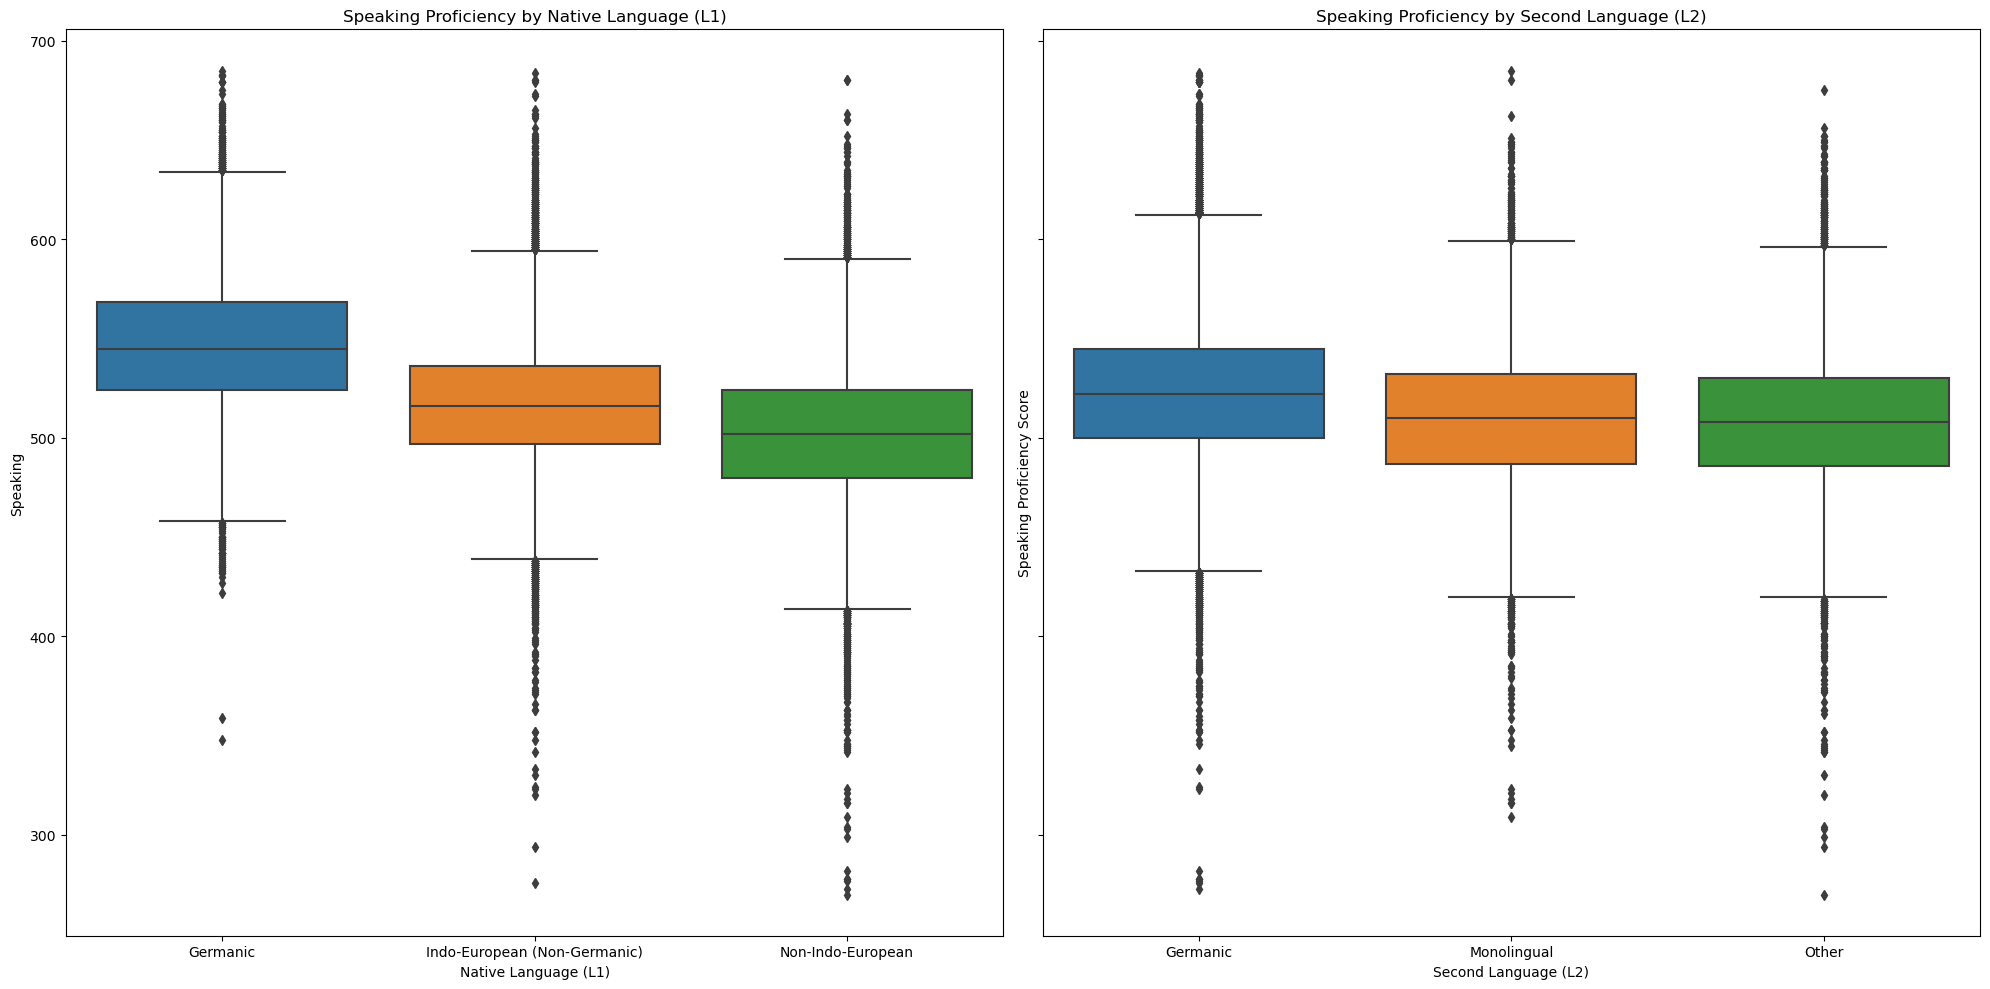

In [28]:
median_order_L1 = df.groupby("L1_mod")["Speaking"].median().sort_values(ascending=False).index
median_order_L2 = df.groupby("L2_mod")["Speaking"].median().sort_values(ascending=False).index

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)  # Two subplots side by side

sns.boxplot(data=df, x='L1_mod', y='Speaking', order=median_order_L1, ax=axes[0])
axes[0].set_title("Speaking Proficiency by Native Language (L1)")
axes[0].set_xlabel("Native Language (L1)")
axes[0].tick_params(axis='x', rotation=0)

sns.boxplot(data=df, x='L2_mod', y='Speaking', order=median_order_L2, ax=axes[1])
axes[1].set_title("Speaking Proficiency by Second Language (L2)")
axes[1].set_xlabel("Second Language (L2)")
axes[1].tick_params(axis='x', rotation=0)

plt.ylabel("Speaking Proficiency Score")  
plt.tight_layout()  
plt.show()

In [29]:
to_drop = ['L1', 'L2', 'Family', 'FamilySpecific']
df = df.drop(to_drop, axis=1)

In [30]:
df.head()

,AaA,LoR,Edu.day,Enroll,Speaking,L1_mod,L2_mod
0,25,0,4.0,93,496,Germanic,Germanic
1,47,2,4.0,93,542,Germanic,Germanic
2,23,23,3.0,93,585,Germanic,Monolingual
3,42,2,2.0,93,521,Germanic,Monolingual
4,22,19,3.0,93,639,Germanic,Monolingual


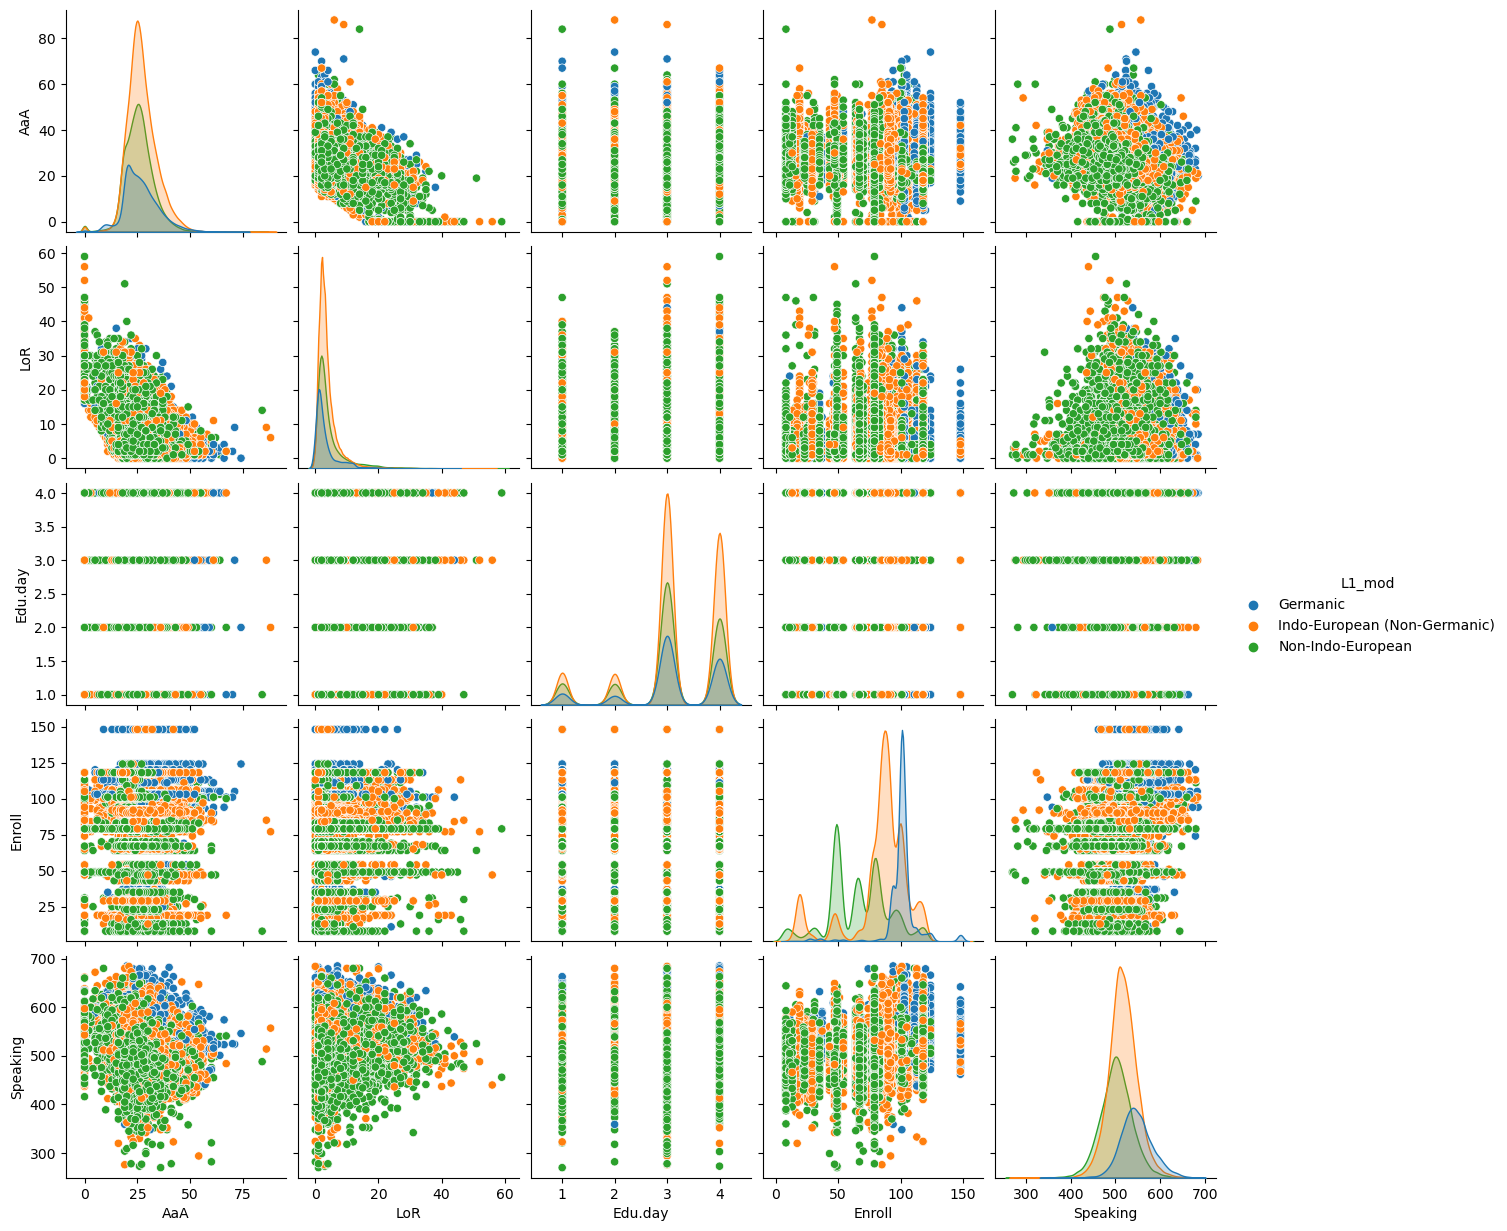

In [31]:
sns.pairplot(df, hue="L1_mod")
plt.show()

# 3. Train/Test split <a id="3"></a>

Splitting your dataset is crucial to evaluate model generalization by ensuring that the model learns from a training set and is tested on a separate unseen test set, preventing overfitting and providing a reliable measure of performance on new data.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [33]:
X = df.drop(columns=['Speaking'])  
y = df['Speaking']  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (40180, 6). Training labels size: (40180,)
Test set size: (10046, 6). Test labels size: (10046,)


# 4. Feature Engineering <a id="4"></a>

In [36]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
ordinal_columns = ['Edu.day']
numerical_columns = ['AaA', 'LoR', 'Enroll']

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_columns),  
        ('ord', OrdinalEncoder(), ordinal_columns),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)  
    ]
)

In [42]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
numerical_column_names = numerical_columns
ordinal_column_names = ordinal_columns

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a list
all_column_names = list(numerical_column_names) + list(ordinal_column_names) + list(categorical_column_names)

In [45]:
# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

# Display the first few rows of the processed DataFrame
X_train_processed_df.head()

,AaA,LoR,Enroll,Edu.day,L1_mod_Indo-European (Non-Germanic),L1_mod_Non-Indo-European,L2_mod_Monolingual,L2_mod_Other
0,1.000,1.666667,0.575758,3.0,0.0,0.0,0.0,1.0
1,-0.125,-0.333333,-0.212121,3.0,0.0,1.0,0.0,0.0
2,-0.250,-0.666667,-1.121212,3.0,0.0,1.0,0.0,0.0
3,-0.250,0.333333,-0.666667,1.0,0.0,1.0,0.0,0.0
4,-0.625,-0.333333,0.000000,1.0,1.0,0.0,0.0,1.0


In [46]:
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

# Display the first few rows of the processed test DataFrame
X_test_processed_df.head()

,AaA,LoR,Enroll,Edu.day,L1_mod_Indo-European (Non-Germanic),L1_mod_Non-Indo-European,L2_mod_Monolingual,L2_mod_Other
0,-0.375,-0.333333,-0.030303,2.0,1.0,0.0,0.0,0.0
1,-0.250,-0.333333,-1.727273,2.0,1.0,0.0,0.0,0.0
2,1.250,0.000000,-1.121212,3.0,0.0,1.0,0.0,1.0
3,0.625,-0.333333,-0.212121,3.0,0.0,1.0,0.0,0.0
4,2.750,-0.333333,0.575758,2.0,0.0,0.0,1.0,0.0


# 5. Regression Modeling <a id="5"></a>

This is a regression problem because we are predicting a score (Speaking Proficiency), which can take any value within a range, rather than assigning a fixed category like "beginner" or "advanced."

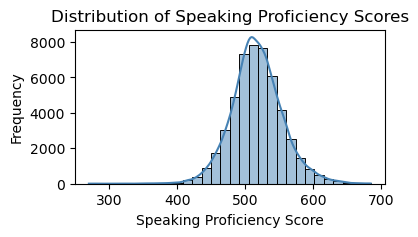

In [47]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Speaking'], kde=True, bins=30, color="steelblue")

plt.xlabel("Speaking Proficiency Score")
plt.ylabel("Frequency")
plt.title("Distribution of Speaking Proficiency Scores")

plt.show()

In [48]:
df.Speaking.describe()

count    50226.000000
mean       517.621451
std         37.917945
min        270.000000
25%        494.000000
50%        516.000000
75%        540.000000
max        685.000000
Name: Speaking, dtype: float64

#### Baseline performance

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

y_mean_pred = np.full_like(y_test, y_train.mean())  # Predicting the mean for all test samples
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_mean_pred))
r2_baseline = r2_score(y_test, y_mean_pred)

print(f"Baseline RMSE: {rmse_baseline}")
print(f"Baseline R²: {r2_baseline}")

Baseline RMSE: 37.7311088065254
Baseline R²: -0.0009804584101900105


We will start with the following models:
- Linear Regression 
- Lasso Regresion 
- Decision Tree
- Ranfom Forest 
- Gradient Boosting 
- XGBoost
- Multi-layer perceptron 

In [50]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_jobs=-1),
    "Multi-layer Perceptron": MLPRegressor(max_iter=1000, batch_size=32, early_stopping=True)

}

Using cross-validation so we can estimate how well a model will generalize to unseen data before actually testing it on the real test set. 

In [52]:
# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {model} ...")
    
    # Perform cross-validation and compute RMSE for training
    cv_rmse_train = np.sqrt(-cross_val_score(model, X_train_processed_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
    cv_r2_train = cross_val_score(model, X_train_processed_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

    # Train the model on full training data and predict on the test set
    model.fit(X_train_processed_df, y_train)
    y_pred = model.predict(X_test_processed_df)
    
    # Store trained model
    trained_models[name] = model

    # Compute test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name, 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by=["RMSE test", "R² Score test"], ascending=[True, False])

Training LinearRegression() ...
Training Lasso() ...
Training DecisionTreeRegressor() ...
Training RandomForestRegressor(n_jobs=-1) ...
Training GradientBoostingRegressor() ...
Training XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...) ...
Training MLPRegressor(batch_size=32, early_stopping=True, max_ite

In [53]:
results_df

,Model,RMSE train (CV Mean),R² Score train (CV Mean),RMSE test,R² Score test
5,XGBoost,31.751723,0.300377,31.124548,0.318866
4,Gradient Boosting,31.649487,0.304948,31.264667,0.312719
6,Multi-layer Perceptron,31.982931,0.286877,31.644446,0.295921
0,Linear Regression,32.696324,0.258246,32.316349,0.265704
1,Lasso Regression,33.374313,0.227194,33.057247,0.231649
3,Random Forest,34.277897,0.184388,33.949810,0.189597
2,Decision Tree,40.904841,-0.158214,39.973181,-0.123476


- The standard deviation of `Speaking` is ~37.9, which gives us context on the error values.
- The best models have RMSE around ~31, meaning their average prediction error is within 31 points of the actual score. Since 31 is lower than the standard deviation (37.9), these models reduce the variability in scores but still have room for improvement.
- The best models are doing better than random guessing, but errors are still large relative to the range of scores.
- By looking at the R² Score we can see that the best models are still only explaining ~30% of the variance, which suggests that important predictors might be missing, or the data is inherently noisy.

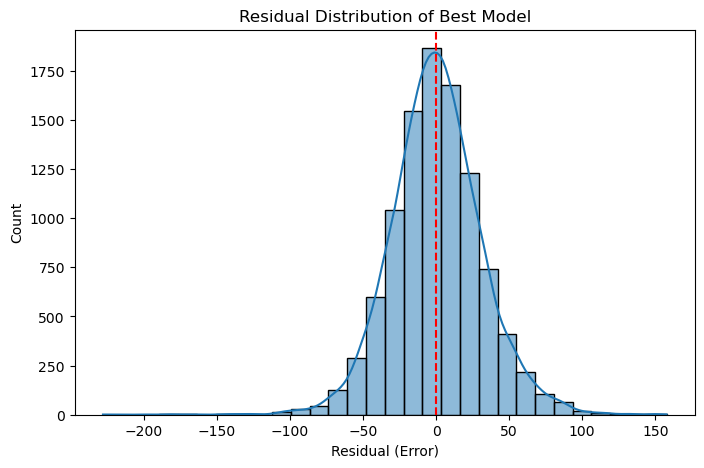

In [54]:
y_pred_best = trained_models[results_df.iloc[0]['Model']].predict(X_test_processed_df)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model")
plt.show()

✅ If residuals are centered around 0 and normally distributed, the model is working well even if R² is low. 
    - Centered around 0 means that the model isn't systematically overpredicting or underpredicting. 
    - Bell shaped means errors are random and normally distributed. 
    
In other words, the model is making errors, but they are expected and random rather than systematic.

Example: Imagine two students with identical backgrounds, education, and experience. One scores 300, and the other scores 600. Your model can’t predict this because other unknown factors influence the score (e.g., motivation, study habits, exposure to Dutch). This results in a lower R² because the model isn’t capturing 100% of the variability—even though it's making unbiased predictions.

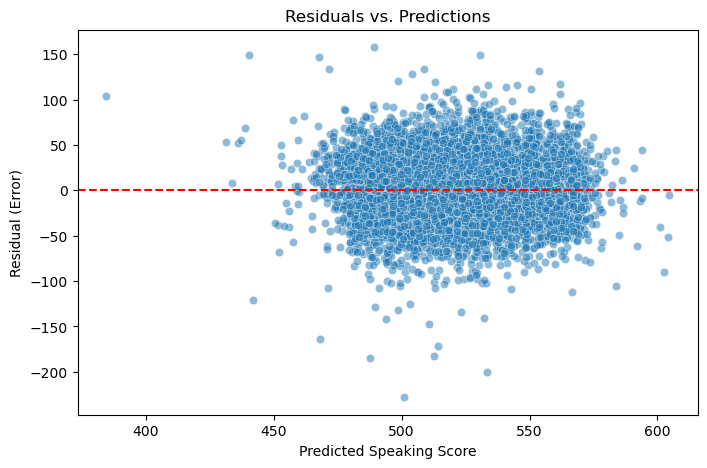

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Speaking Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

Exploring Lasso:

In [56]:
lasso_model = trained_models["Lasso Regression"]
lasso_coefficients = pd.DataFrame(lasso_model.coef_, index=X_train_processed_df.columns, columns=['Lasso Coefficient']).sort_values(['Lasso Coefficient'], key=abs, ascending=False)

lasso_coefficients

,Lasso Coefficient
L1_mod_Non-Indo-European,-19.532840
Enroll,12.767557
L1_mod_Indo-European (Non-Germanic),-11.602229
AaA,-4.955253
L2_mod_Monolingual,-4.822165
Edu.day,0.850597
LoR,0.253591
L2_mod_Other,-0.000000


We examined the Lasso coefficients to identify unnecessary variables (since Lasso automatically selects features by shrinking less important ones to zero), but the results suggest that all retained features contribute meaningfully to the model, so no further feature elimination is needed.

# 6. Hyperparameter tuning <a id="6"></a>

In [57]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 6, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Multi-layer Perceptron": {
        "hidden_layer_sizes": [(50,), (100,), (50,50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 2, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Linear Regression": {}
}

# Models dictionary
models = {
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Multi-layer Perceptron": MLPRegressor(max_iter=3000),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Linear Regression": LinearRegression()
}

best_models = {}
best_params = {}

results_hyperparameter = []

for name, model in models.items():
    print(f"Tuning {name}...")
    search = GridSearchCV(model, param_grid=param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train_processed_df, y_train)
    
    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_
    
    # Compute RMSE and R² on train and test sets
    y_train_pred = search.best_estimator_.predict(X_train_processed_df)
    y_test_pred = search.best_estimator_.predict(X_test_processed_df)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "RMSE Train": rmse_train,
        "R² Train": r2_train,
        "RMSE Test": rmse_test,
        "R² Test": r2_test
    })
    
    print(f"Best parameters for {name}: {search.best_params_}")
    print("-----------------------------------")

# Store results in a pandas DataFrame
results_hyp_df = pd.DataFrame(results_hyperparameter)

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
-----------------------------------
Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
-----------------------------------
Tuning Multi-layer Perceptron...
Best parameters for Multi-layer Perceptron: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
-----------------------------------
Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
-----------------------------------
Tuning Linear Regression...
Best parameters for Linear Regression: {}
-----------------------------------


In [58]:
results_hyp_df.sort_values(['RMSE Test', 'R² Test'], ascending=[True,False])

,Model,Best Params,RMSE Train,R² Train,RMSE Test,R² Test
0,XGBoost,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",30.856687,0.339492,30.960033,0.326048
3,Random Forest,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",29.974724,0.376710,31.011400,0.323809
1,Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",30.831951,0.340551,31.057458,0.321799
2,Multi-layer Perceptron,"{'activation': 'tanh', 'hidden_layer_sizes': (...",31.674171,0.304031,31.382922,0.307510
4,Linear Regression,{},32.687636,0.258781,32.316349,0.265704


- All of our top models exhibit very similar performance metrics, suggesting that their rankings may vary with different data splits. We will choose `XGBoost` with hyperparameters `{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}`.

# 7. Selecting best model <a id="7"></a>

In [63]:
best_model = XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, objective="reg:squarederror")
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_train = np.sqrt(-cross_val_score(best_model, X_train_processed_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
cv_r2_train = cross_val_score(best_model, X_train_processed_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

best_model.fit(X_train_processed_df, y_train)
y_pred = best_model.predict(X_test_processed_df)
    
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
    
BestModelResults = {
        "Model": "XGBoost", 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    }

BestModelResults

{'Model': 'XGBoost',
 'RMSE train (CV Mean)': 31.389442394029267,
 'R² Score train (CV Mean)': 0.3163150504582163,
 'RMSE test': 30.96003283597342,
 'R² Score test': 0.3260475006136624}

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_processed_df.copy()  
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
3,Edu.day,3.842902
4,L1_mod_Indo-European (Non-Germanic),2.742719
5,L1_mod_Non-Indo-European,2.557567
7,L2_mod_Other,1.414540
2,Enroll,1.353744
6,L2_mod_Monolingual,1.238850
1,LoR,1.115638
0,AaA,1.081982


No feature has a VIF>10, therefore none of them are suspected of collinearity. 

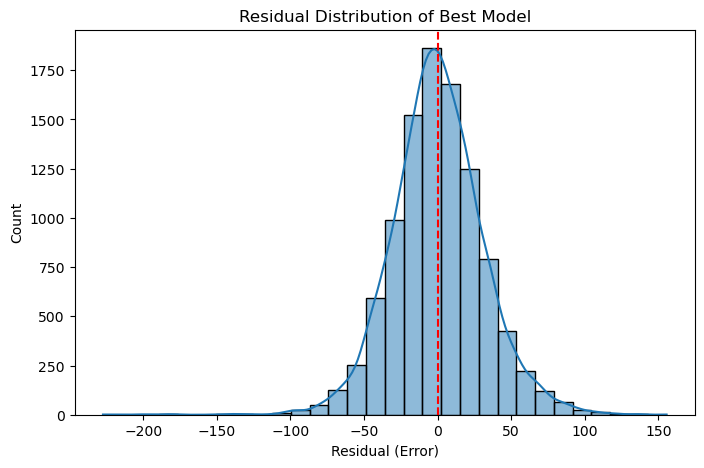

In [65]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model")
plt.show()

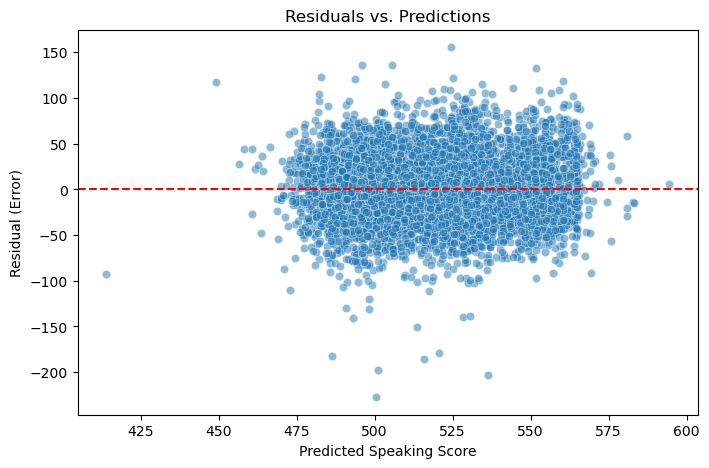

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Speaking Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

The residual analysis suggests that our XGBoost model is performing well, with errors normally distributed and centered around zero, indicating no systematic bias. The residuals are randomly scattered in the residuals vs. predictions plot, showing that the model captures the relationship well without obvious heteroskedasticity or missing patterns. While some outliers exist, they are relatively few and may represent special cases. Overall, the model appears well-calibrated and reliable, though further investigation into outliers could provide additional insights.

# 8. Model interpretation <a id="8"></a>

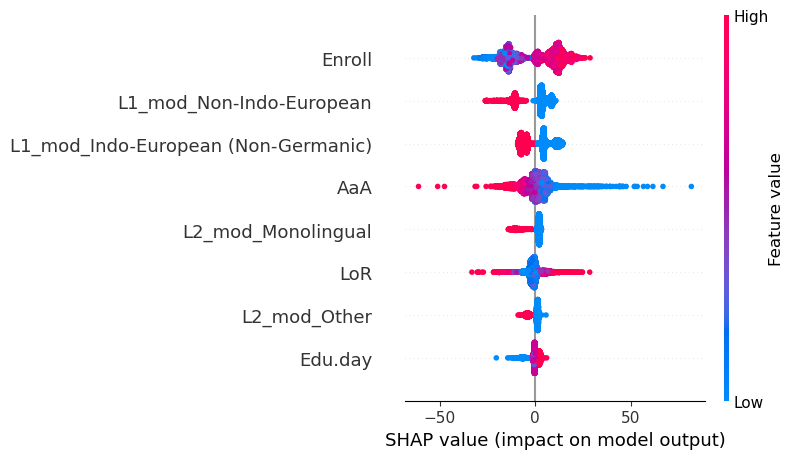

In [67]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_processed_df)

shap.summary_plot(shap_values, X_test_processed_df)

This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions. 

How to understand this:
- x-axis (Impact on Model Output)
    - Negative values decrease the predicted speaking proficiency.
    - Positive values increase the predicted speaking proficiency.
- y-axis (Model Features)
    - The order of the features on the Y-axis is based on overall importance.
- Color (Feature Value Intensity)
    - Red → Feature is at its higher range.
    - Blue → Feature is at its lower range.

# 9. Results <a id="9"></a>

### Main takeaway

This study reveals that enrolling in Dutch language courses is the strongest predictor of speaking proficiency, while passive exposure has little impact unless combined with active learning. Native Germanic speakers perform best, whereas Non-Germanic speakers face greater challenges. Monolingual individuals struggle more, while those with a second language, especially a Germanic one, have an advantage. General formal education has minimal influence, reinforcing that structured Dutch language learning is far more effective than overall schooling background. 

Policy recommendations include expanding access to Dutch courses, offering tailored support for high-risk language groups, promoting early exposure programs, and encouraging multilingual education. Future work should explore longitudinal studies, personalized learning plans, and predictive AI tools to optimize language acquisition strategies. 
<hr>

### Conclusions

- Enrollment in language courses is most important predictor of speaking proficiency in the model. Enrolling in language courses is the most effective way to improve Dutch speaking proficiency.
- Being a native speaker of a Germanic language gives a clear advantage, while Non-Germanic Indo-European and Non-Indo-European speakers struggle more with learning Dutch.
- Monolingual speakers perform worse, while knowing a second language—especially a Germanic one—helps in learning Dutch.
- The younger someone arrives in the Netherlands, the better they tend to do in their Dutch speaking proficiency test.
- Length of residence has a weak impact on speaking proficiency—while short-term residence negatively affects proficiency, long-term residence only improves it when combined with active language learning .
- While general education is important, it has a minor impact on Dutch-speaking proficiency compared to active language learning (Enroll) and linguistic background (L1, L2).


### Business recommendations (for policymakers and educators)
- Since the duration of enrollment in the courses is the strongest predictor, increasing funding and accessibility for Dutch courses can significantly boost language proficiency.
- Learners from Non-Indo-European backgrounds (e.g., Arabic, Chinese, Turkish) face the biggest challenges. Offer customized curricula that address their specific linguistic hurdles.
- Younger arrivals tend to perform better. Policies promoting early immersion (e.g., through youth integration programs) can improve long-term proficiency.
- Since general education has little impact, general schooling requirements should not be prioritized over language-specific training.


### Future Work

- Factors like employment status, socioeconomic background, or motivation level could provide deeper insights.
- Collect more data on diverse languages to better tailor interventions for different language groups.
- A longitudinal study tracking learners before & after course enrollment would provide stronger causal evidence.
- Expanding beyond speaking proficiency could yield more holistic language learning insights.


# 10. Save model <a id="10"></a>

In [72]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "xgboost_best_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print("Saved successfully!")

Saved successfully!
